## Stochastic Gradient Descent(SGD)

-------------------------------------
SGD và các biến thể của nó có lẽ là thuật toán tối ưu phố biến nhất trong machine learning nói chung và deep learning nói riêng.

### 1. Learning Rate 

 Learing rate: Một tham số quan trọng đối với SGD. Trước đây chúng ta thường đặt lr là cố định nhưng thực tế lr thường đc thiết kế giảm dần 
* lr tại vòng lặp k = $ \epsilon_k$

-------------------------------------------------
Tại sao với lại phải thay đổi learning rate ? 

* Trong SGD: Gradient được tính bởi một số mẫu ngẫu nhiên trong tập dữ liệu (1 hoặc 1 vài chứ không phải toàn bộ) nên vô tình nó sẽ tạo ra noise. Và noise này sẽ không giảm khi chúng ta tối ưu qua mỗi vòng lặp vì vòng lặp nào chúng ta cũng chọn ngẫu nhiên vài mẫu để train.

* Còn đối với Batch Gradient Descent nó sử dụng toàn bộ tập train một lúc vì thế nó có thể sử dụng lr cố định 

---------------------------------------------
Thuật toán SGD: 
* Require: learing rate $\epsilon_k$ 
* Require: Init paramter $\theta$
* <b>While</b> (tiêu chí dừng chưa được đáp ứng) <b>do </b>: 
    
    Lấy minibatch của _m_ example từ training set:
    
    * $ x = \{x^{(1)},...,x^{(m)}\}$ 
    * $ y = \{y^{(1)},...,y^{(m)}\}$
* Tính gradient:
    * $\boldsymbol{g}  = \frac{1}{m}\sum_i\nabla_\theta L(f(x^{(i)};\boldsymbol{\theta}),\boldsymbol{y^{(i)}})$

* Update:
    * $\boldsymbol{\theta} = \boldsymbol{\theta} - \epsilon_k$

* <b>End while </b>

------------------------------
Điều kiện hội tụ của SGD: 
* $ \sum_{k = 1}^\infty\epsilon_k = \infty $ 

and 

* $ \sum_{k = 1}^\infty\epsilon_k^2 < \infty$ 

Trong thực tế thì learning rate giảm dần bằng cách phân rã tuyến tính( ví dụ decay = 0.9 thì sau 1 iter giảm 10% đến khi đủ nhỏ thì dừng lại) 

$$\epsilon_k = (1- \alpha)\epsilon_0 + \alpha\epsilon_t$$ 

Trong đó $\alpha = \frac{k}{t}$ còn $\epsilon_t$ là thời điểm _lr_ đủ nhỏ và sau iter _t_ thì thường _lr_ được cố định 


-----------------------------
Learning rate có thể được chọn bằng các thử(trial) và sai(error) và nó đòi hỏi sự hiểu biết và kinh nghiệm, nhưng thường tốt nhất để chọn nó bằng các theo dõi learning curves(biểu đồ vẽ hàm mục tiêu theo thời gian)

Khi sử dụng linear schedule, các parameter phải chọn từ đầu là $\epsilon_0, \epsilon_t, t$

* _t_ : Thông thường _t_ được thiết lập sao cho lặp được vài trăm lần qua training set. 
* $\epsilon_t$: Thông thườn được thiết lập = 1% $ \epsilon_0 $ 
* $\epsilon_0$: Main question ????? 
    * Nếu quá lớn -> learning curve dao động mạnh, cost thường tăng đáng kể 
    * Nếu quả nhỏ -> quá trình diễn ra chậm, có thể kẹt với high cost value
    * Tốt nhất là chúng ta sẽ huấn luyện với với một _lr_ sau đó quan sát và lấy lại _lr_ cao hơn 1 chút so với _lr_ tại thời điểm đó( sau khoảng 100 iter) 

### 2. Property

Thuộc tính quan trọng nhất của SGD và minibatch hay gradient online là thời gian tính toán cho mỗi lần update là ko đổi theo kích thước của training set. Điều này cho phép hội tụ ngay cả trước khi lặp qua tất cả trainning set 

--------------------------------------

Để nghiên cứu tốc độ hội tụ của một thuật toán tối ưu hóa người ta thường đo: 

<b> excess error </b> = $J(\theta) - min_\theta(\theta) $ 

Qua nghiên cứu ngta thấy được tốc độ tối ưu cao nhất mà nên đạt tới là O(1/k) mà chúng ta không cần phải cố hơn vì tối ưu nhanh quá thì rất có thể bị overfitting 


--------------------------------------------

Qua thực tế người ta thấy rằng tốc độ SGD là vượt trội ở giai đoạn đầu(xa điểm tối ưu) nhưng rất chậm khi càng tiến gần đến điểm tối ưu ngược lại so với Batch Gradient Descent. Vì vậy để lấy được điểm mạnh của các hai thuật toán này chúng ta có thể thay đổi kích thước minibatch trong quá trình train (tăng dần) để cân bằng được việc nhanh đầu và khi đến gần vị trí tối ưu

### 3. Coding 

In [12]:
from sklearn.preprocessing import StandardScaler 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split


In [4]:
from sklearn.datasets import fetch_california_housing 
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
data.data.shape

(20640, 8)

In [9]:
df = pd.DataFrame(data = data.data,columns=data.feature_names)
df['Price'] = data.target
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(data.data,data.target,test_size = 0.2)

scalar = StandardScaler() 
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [16]:
X_train.shape

(16512, 8)

#### Stochstic Gradient Descent 

In [33]:
 def sgd(X_train,Y_train,lr,lr_variation,epochs,power_epochs):
    w = np.random.randn(8,1)
    b = np.random.randn(1,1) 
    loss_log = []
    for epoch in range(1+ epochs):
        error = 0 
        N = X_train.shape[0] 
        for i in range(N):
            index = np.random.choice(0,N) 
            X_i = X_train[index,:].reshape(1,X_train.shape[1])
            Y_i = Y_train[index].reshape(1,1) 

            Y_pred = np.dot(X_i,w) + b 
            loss = Y_pred - Y_i 
            error += loss**2

            w_grad = X_i.T.dot(Y_pred - Y_i)
            b_grad = (Y_pred - Y_i) 

            w = w - (2/N) * lr * w_grad 
            b = b - (2/N) * lr * b_grad 
        loss_log.append(error)
        if epoch%10 == 0:
            print(f"Epoch {epoch} - Loss: {error}")
        if lr_variation == 'invscaling':
            lr = lr/pow(epochs,power_epochs) 
    return w,b,loss_log

In [30]:
def predict(X_test,w,b) :
    X_test = np.array(X_test)
    Y_pred = [] 
    for i in range(len(X_test)):
        y = np.asscalar(np.dot(w,X_test[i]) + b) 
        Y_pred.append(y) 
    return Y_pred

In [54]:
w_optimal,b_optimal,log_loss = sgd(X_train,Y_train,lr = 1,lr_variation='invscaling',epochs=100,power_epochs=0.2)

Epoch 0 - Loss: [[62827.60796547]]
Epoch 10 - Loss: [[15034.01711376]]
Epoch 20 - Loss: [[12937.32833964]]
Epoch 30 - Loss: [[13989.58174005]]
Epoch 40 - Loss: [[14088.72385156]]
Epoch 50 - Loss: [[14067.91519986]]
Epoch 60 - Loss: [[13123.50604628]]
Epoch 70 - Loss: [[14670.06590218]]
Epoch 80 - Loss: [[13027.60851205]]
Epoch 90 - Loss: [[14918.24239729]]
Epoch 100 - Loss: [[13983.75776341]]


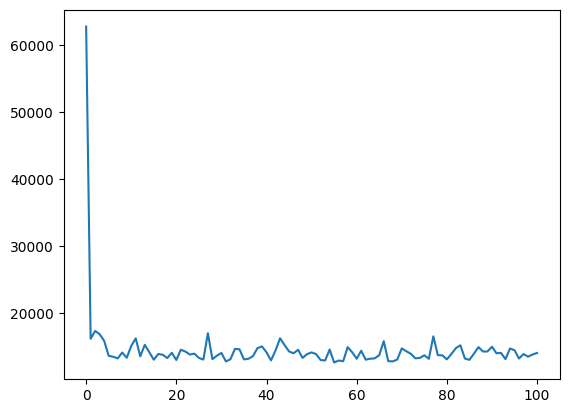

In [56]:
plt.plot(np.asarray(log_loss).flatten())

Có thể thấy nó loss giảm rất nhanh ở nhưng giai đoạn đầu nhưng càng gần vị trí tối ưu thì lại càng luẩn quẩn 

#### Batch Gradient Descent 

In [ ]:
def gd(X_train,Y_train,lr,batch_size,epochs):
    w = np.random.rand(8,1) 
    b = np.random.rand(1,1) 
    loss_log = []

    for epoch in range(epochs+1):
        error = 0 
        N = X_train.shape[0]

        for i in range(round(N/batch_size)):
            index = np.random.choice(range(N),batch_size)
            X_batch = X_train[index,:]
            Y_batch = Y_train[index]
        
            Y_pred = np.dot(X_batch,w) + b 
            loss = Y_pred - Y_batch
            error += np.sum(loss**2) 

            w_grad = X_batch.T.dot(Y_pred - Y_batch)
            b_grad = Y_pred - Y_batch

            w = w - (2/N) * lr * w_grad 
            b = b - (2/N) * lr * b_grad 
        loss_log.append(error) 
        if epoch%10 == 0:
            print(f"Epoch: {epoch} - Loss: {error}") 
    return w,b,loss_log

In [64]:
w_optimal,b_optimal,log_loss = gd(X_train,Y_train,lr=0.01,batch_size = 32,epochs=100)

Epoch: 0 - Loss: 3644456.334565588
Epoch: 10 - Loss: 2531560.2432906656
Epoch: 20 - Loss: 2871906.030841388
Epoch: 30 - Loss: 2223429.0231706533
Epoch: 40 - Loss: 1959306.7219635183
Epoch: 50 - Loss: 1972944.246016478
Epoch: 60 - Loss: 1879481.6252527025
Epoch: 70 - Loss: 1899568.3787577606
Epoch: 80 - Loss: 1801452.54870541
Epoch: 90 - Loss: 1749408.6856376224
Epoch: 100 - Loss: 1736220.9003692826


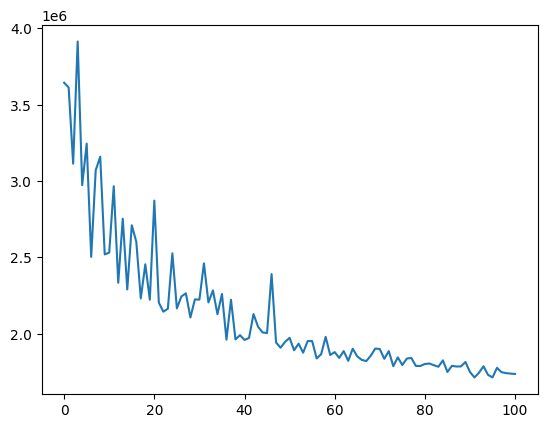

In [65]:
plt.plot(np.asarray(log_loss).flatten())

Giai đoạn đầu xuống chậm nhưng dần dần sẽ ổn định hơn đi đến gần vị trí tối ưu